Done by:
    Maria George and Aya Adel 

#### The commented code was  for geting the features using mediapipe , crop the images to get the face only and retrieve a csv file to work on it 

In [1]:
# %%capture
# !pip install mediapipe

In [2]:
# %%capture
# if os.path.isfile('/content/AFLW2000-3D.zip') == False:
#   !gdown --id  1fP3zvSCYjll_o_m7S12nvQLZ9MnsEoap
#   !unzip /content/AFLW2000-3D.zip

In [3]:
# def get_list_from_filenames(file_path):
#     # input:    relative path to .txt file with file names
#     # output:   list of relative path names
#     lines = [Path(f).stem for f in glob.glob(file_path)]
#     return lines

In [4]:
# def get_ypr_from_mat(mat_path):
#     # Get yaw, pitch, roll from .mat annotation.
#     # They are in radians
#     mat = sio.loadmat(mat_path)
#     # [pitch yaw roll tdx tdy tdz scale_factor]
#     pre_pose_params = mat['Pose_Para'][0]
#     # Get [pitch, yaw, roll]
#     pose_params = pre_pose_params[:3]
#     return pose_params

In [5]:
# class AFLW2000():
#     def __init__(self, data_dir,file_path, mat_dir='AFLW2000/', img_ext='.jpg', annot_ext='.mat', image_mode='RGB'):
#         self.data_dir = data_dir
#         self.file_path = file_path
#         self.mat_dir = mat_dir
#         self.img_ext = img_ext
#         self.annot_ext = annot_ext

#         filename_list = get_list_from_filenames(data_dir)
        
#         filename_list.sort()
#         self.X_train = filename_list
#         self.y_train = filename_list
#         self.image_mode = image_mode
#         self.length = len(filename_list)

  
#     def __getdata__(self, index):
#         image_path=os.path.join(self.file_path,self.X_train[index] + self.img_ext)
       
#         path = Path(image_path)
#         if path.is_file() == True:
            
#             img = Image.open(image_path)
#             img = img.convert(self.image_mode)
          
#             mat_path = os.path.join(self.mat_dir,self.y_train[index] + self.annot_ext)
            
#             #pt2d = get_pt3d_from_mat(mat_path)
#             pt2d = get_468features(image_path)

#             # We get the pose in radians
#             pose = get_ypr_from_mat(mat_path)
#             # And convert to degrees.
#             pitch = pose[0] * 180 / np.pi
#             yaw = pose[1] * 180 / np.pi
#             roll = pose[2] * 180 / np.pi
            
#             cont_labels = [yaw, pitch, roll]
            
#             return pt2d[0] ,pt2d[1], cont_labels , self.X_train[index]

#     def __len__(self):
#         # 2,000
#         return self.length

In [6]:
# demo=AFLW2000("AFLW2000/*.mat",'AFLW2000/')

In [7]:
# def read_fullDataset(demo):    
#     features_x468=[]
#     features_y468=[]
#     labels=[]
#     imgs=[]
#     for i in range(2000):
#         getdata = demo.__getdata__(i)
#         if getdata != None:
#           #print(getdata)
#           if len(getdata[0]) == 468 and len(getdata[1]) == 468 :
#             features_x468.append(getdata[0])
#           # print(getdata)
#             features_y468.append(getdata[1])
#             x = np.array(getdata[2], dtype=np.float32)
#             labels.append(x)
#             imgs.append(getdata[3])


#     #print(features_x468[0])
#     data_x68 = np.array(features_x468, dtype=np.float32)
#     #print(data_x68)
#     data_y68 = np.array(features_y468, dtype=np.float32)
#     labels = np.array(labels, dtype=np.float32)
#     images_name = np.array(imgs)
#     data68 = np.concatenate((data_x68,data_y68,labels),axis=1)

#     col=[]
#     for i in range(468):
#         col.append('x'+str(i))

#     for i in range(468):
#         col.append('y'+str(i))

#     col.append("Yaw")
#     col.append("pitch")
#     col.append("roll")
    
#     full_df = pd.DataFrame(data68,columns=col) #convert to a dataframe
#     return full_df,images_name

In [8]:
# df , images_name = read_fullDataset(demo)
# df['image']=images_name
# df.to_csv("newfullData.csv",index=False) #save to file

In [9]:
# x_min = np.array(df.iloc[:, :467].min())
# x_max =  df.iloc[:, :467].max()
# y_min =  df.iloc[:, 468:936].min()
# y_max =  df.iloc[:, 468:936].max()

# int(y_min[0]) ,int(y_max[0]), int(x_min[0]),int(x_max[0])

In [10]:
# def crop_all_images(df):
#     random_file = df["image"]
#     for i in range (1853):

#       df_test = df.loc[df['image'] == random_file[i]]
#       df_test_X = df_test.loc[:, df_test.columns.str.startswith('x')]
#       df_test_Y = df_test.loc[:, df_test.columns.str.startswith('y')]


#       min_x = int(df_test_X.min(axis=1).values[0])
#       max_x = int(df_test_X.max(axis=1).values[0])
#       min_Y = int(df_test_Y.min(axis=1).values[0])
#       max_Y = int(df_test_Y.max(axis=1).values[0])
#       image = cv2.imread('/content/AFLW2000/'+random_file[i]+'.jpg')
#       img = cv2.cvtColor(image,  cv2.COLOR_BGR2RGB)
#       cropped_image = img[min_Y :max_Y, min_x :max_x,:] 
#       if (cropped_image.size) != 0:
#         cv2.imwrite("/content/cropped_images/"+random_file[i]+'.jpg', cropped_image)


In [11]:
# crop_all_images(df)
# cropped_demo =  AFLW2000("AFLW2000/*.mat",'cropped_images/')

In [12]:
# df_cropped , images_name = read_fullDataset(cropped_demo)
# df_cropped['image']=images_name
# df_cropped.to_csv("cropped_data.csv",index=False) #save to file

### Imports:

In [13]:
import numpy as np
import os
import scipy.io as sio
import cv2
import math
import dlib
import glob
import os.path
from pathlib import Path
import pandas as pd
from PIL import Image, ImageFilter
from math import cos, sin
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import mediapipe
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

### Using dlib shape predictor to draw the axis on the nose 

In [14]:
predictor=dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
cnn_face_detector = dlib.get_frontal_face_detector()

### Helper_Functions:

In [15]:
#Function to get the features by giving it the file name which is the image name.
def get_468features(random_file):
    faceModule = mediapipe.solutions.face_mesh
    all_x ,all_y =[] ,[]
    all_xy=[]
    # loading image and its correspinding mat file
    with faceModule.FaceMesh(static_image_mode=True) as faces:
      # loading the image
      image = cv2.imread(random_file)
      # processing the face to extract the landmark points (468 point) for each x,y,z
      results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      if results.multi_face_landmarks != None: 
        # looping over the faces in the image
        for face in results.multi_face_landmarks:
            for landmark in face.landmark:
                x = landmark.x
                y = landmark.y
                # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
                shape = image.shape 
                relative_x = int(x * shape[1])
                relative_y = int(y * shape[0])
                # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
                all_x.append(relative_x)
                all_y.append(relative_y)
                all_xy.append(relative_x)
                all_xy.append(relative_y)
                #cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)

        #cv2_imshow(image)
    return all_xy, all_x , all_y

In [16]:
#Function to get the features by giving it the  image itself.
def get_468features_image(image):
    faceModule = mediapipe.solutions.face_mesh
    all_x ,all_y =[] ,[]
    all_xy=[]
    # loading image and its correspinding mat file
    with faceModule.FaceMesh(static_image_mode=True) as faces:
      # loading the image
      # processing the face to extract the landmark points (468 point) for each x,y,z
      results = faces.process(image)
      if results.multi_face_landmarks != None: 
        # looping over the faces in the image
        for face in results.multi_face_landmarks:
            for landmark in face.landmark:
                x = landmark.x
                y = landmark.y
                # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
                shape = image.shape 
                relative_x = int(x * shape[1])
                relative_y = int(y * shape[0])
                # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
                all_x.append(relative_x)
                all_y.append(relative_y)
                all_xy.append(relative_x)
                all_xy.append(relative_y)
                #cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)

        #cv2_imshow(image)
    return all_xy, all_x , all_y

In [17]:
# draw axis function
def draw_axis(img, pitch,yaw,roll, tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

In [18]:
# draw the mesh 
def draw_meshonface(dir,random_file):

  faceModule = mediapipe.solutions.face_mesh
  # loading image and its correspinding mat file
  with faceModule.FaceMesh(static_image_mode=True) as faces:
      # loading the image
      image = cv2.imread(dir+random_file)
      # processing the face to extract the landmark points (468 point) for each x,y,z
      results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      if results.multi_face_landmarks != None: 
        # looping over the faces in the image
        for face in results.multi_face_landmarks:
            for landmark in face.landmark:
                x = landmark.x
                y = landmark.y
                # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
                shape = image.shape 
                relative_x = int(x * shape[1])
                relative_y = int(y * shape[0])
                # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
                cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
  return image

In [19]:
# to crop the test image
def crop_image(image,x,y):

    min_x = int(min(x))
    max_x = int(max(x))
    min_Y = int(min(y))
    max_Y = int(max(y))
    cropped_image = image[min_Y :max_Y, min_x :max_x,:] 
    
    return cropped_image


### Reading Data:

In [20]:
df_with_image = pd.read_csv("cropped_data.csv")
df = df_with_image.drop('image_name',axis=1)
df

,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,...,Y465,X466,Y466,X467,Y467,X468,Y468,pitch,yaw,roll
0,40.0,162.0,17.0,138.0,35.0,143.0,15.0,110.0,13.0,131.0,...,79.0,41.0,82.0,83.0,60.0,87.0,55.0,-0.339877,0.943137,-0.492823
1,72.0,149.0,63.0,123.0,69.0,132.0,58.0,98.0,62.0,115.0,...,78.0,82.0,79.0,129.0,65.0,134.0,60.0,-0.133372,0.163064,-0.128209
2,113.0,192.0,109.0,166.0,111.0,172.0,98.0,130.0,107.0,156.0,...,93.0,123.0,97.0,180.0,73.0,184.0,71.0,-0.284248,-0.013198,-0.100999
3,70.0,172.0,61.0,145.0,69.0,153.0,60.0,112.0,60.0,136.0,...,88.0,92.0,90.0,151.0,78.0,157.0,75.0,-0.156882,0.404901,0.019756
4,145.0,133.0,149.0,109.0,142.0,117.0,129.0,86.0,147.0,101.0,...,64.0,129.0,65.0,155.0,48.0,157.0,44.0,0.018702,-0.456421,-0.306169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,118.0,116.0,129.0,102.0,118.0,106.0,121.0,87.0,130.0,97.0,...,73.0,117.0,74.0,123.0,70.0,124.0,67.0,-0.526114,-0.936169,0.436408
1755,124.0,143.0,119.0,106.0,121.0,121.0,106.0,80.0,117.0,96.0,...,64.0,128.0,64.0,179.0,52.0,184.0,48.0,0.220081,-0.019240,-0.151849
1756,131.0,147.0,144.0,125.0,133.0,130.0,137.0,99.0,147.0,118.0,...,77.0,141.0,79.0,166.0,69.0,169.0,67.0,-0.330587,-0.495866,0.183937
1757,110.0,152.0,107.0,127.0,108.0,133.0,96.0,98.0,106.0,119.0,...,71.0,117.0,73.0,168.0,55.0,172.0,52.0,-0.096165,0.026025,-0.116955


### Pre-Processing:

In [21]:
#split the data into features and lables 
features = df.iloc[:, :936]
y_all=df.iloc[:, 936:]

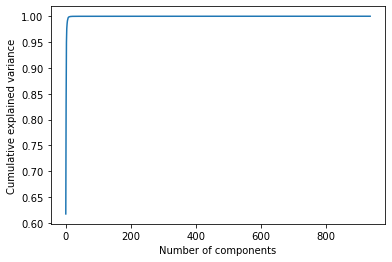

In [22]:
# to know the number of n_components of pca
pca = PCA(n_components=936)
pca.fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_),)
plt.xlabel('Number of components');
plt.ylabel('Cumulative explained variance');

### Pipeline:
##### Normalize , Pca , Model.

In [23]:
x_train, x_test, y_train, y_test = train_test_split(features, y_all,test_size=0.3,random_state=99)

pipe = Pipeline([('Normalize', StandardScaler()),
                 ('pca', PCA(n_components=10)), 
                 ('svr', MultiOutputRegressor(SVR(epsilon=0.05),n_jobs=-1))])

In [24]:
sv_pipline = pipe.fit(x_train, y_train)

### Evaluation:

In [25]:
scores = cross_val_score(pipe, x_test, y_test, cv=5,scoring='r2')
print(" R2 score: ",np.mean(scores))

scores_absolute = cross_val_score(pipe, x_test, y_test, cv=10,scoring='neg_mean_absolute_error')
print(" mean_absolute_error: ", np.mean(abs(scores_absolute)))

 R2 score:  0.83117149072065
 mean_absolute_error:  0.07313103560847603


### Test on image:

In [26]:
file='AFLW2000/image00053.jpg'
image_test_1 = cv2.imread(file)
xy_all , x_a , y_a=get_468features(file)

In [27]:
image_test_cropped = crop_image(image_test_1,x_a,y_a)

In [28]:
xy_468_landmarks ,all_x,all_y=get_468features_image(image_test_cropped)

In [29]:
pitch_p,yaw_p,roll_p = sv_pipline.predict([xy_468_landmarks]).flatten()
pitch_p,yaw_p,roll_p

(-0.12546109015445947, -0.05785640341301077, -0.004833040957805408)

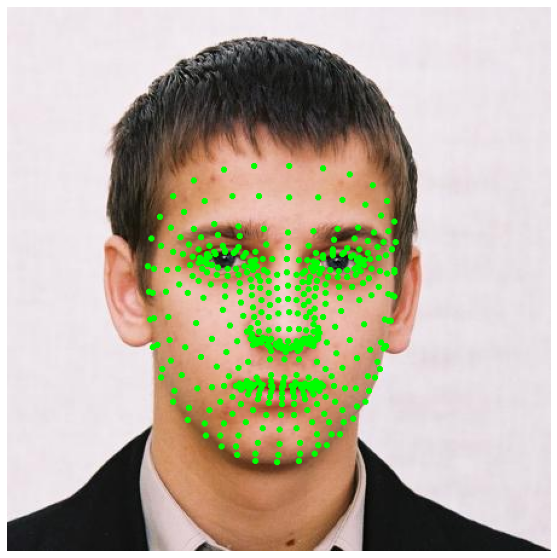

In [30]:
img_test = draw_meshonface('',file)
plt.figure(figsize =(10, 10))
plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

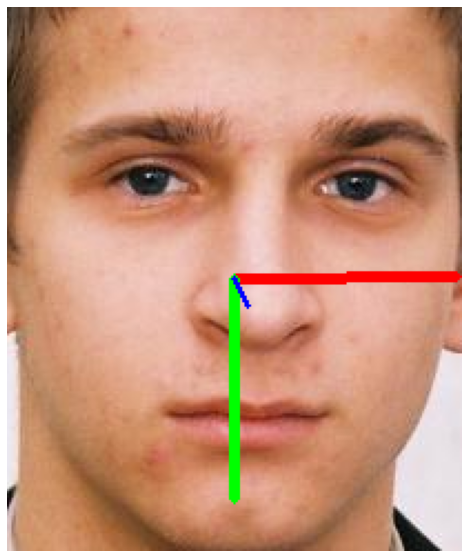

In [31]:
import matplotlib.pyplot as plt
image_test_full = cv2.imread(file)
img_test_our = draw_axis(image_test_cropped,pitch_p,yaw_p,roll_p)
plt.figure(figsize =(10, 10))
plt.imshow(cv2.cvtColor(img_test_our, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## live  video:

In [32]:
video_capture = cv2.VideoCapture(0)
video_capture.set(cv2.CAP_PROP_BUFFERSIZE, 3)
while True:
    
    ret, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    xy_full, x_full,y_full =get_468features_image(gray)
    cropeed_image = crop_image(gray,x_full,y_full)

    dets = cnn_face_detector(gray, 1)
    if dets:
        for k, d in enumerate(dets):
            shape = predictor(gray, d)
            tdx,tdy=shape.part(30).x, shape.part(30).y

            xy_468_landmarks, x_cropped , y_cropped = get_468features_image(cropeed_image)#.flatten()
           

            # insert the xy_landmarks to our ml model to predict yaw,roll,pitch
         
            pitch_predicted, yaw_predicted,roll_predicted = sv_pipline.predict([xy_468_landmarks]).flatten()

            img_test = draw_axis(frame,pitch_predicted,yaw_predicted,roll_predicted,tdx,tdy)

            cv2.imshow('Video', img_test)
            
    else:
            cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
video_capture.release()
cv2.destroyAllWindows()